# Simple pandas rename, matplotlib graph 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# print working dir
!pwd

/c/Users/IsabelleBernard/OneDrive - Necando Solutions Inc/Notebooks


In [3]:
# print what's in data repo
!ls data

ex1data1.csv


In [4]:
data = pd.read_csv(r'data/ex1data1.csv', header = None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.shape

(97, 2)

In [6]:
data.rename({0: 'Population_10K', 1: 'Profits_10K'}, axis=1, inplace=True)

In [7]:
X = data.iloc[:,0]
y = data.iloc[:,1]

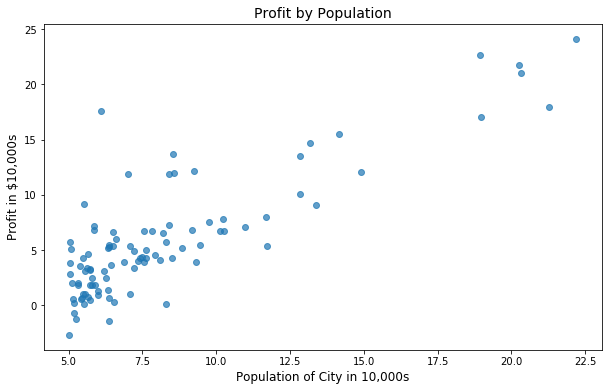

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X, 
            y,
           alpha = 0.7)
plt.title('Profit by Population', size = 14)
plt.xlabel('Population of City in 10,000s', size = 12)
plt.ylabel('Profit in $10,000s', size = 12)
plt.show()

In [36]:
data['store_type'] = (['sport', 'nutrition', 'fitness', 'outdoor', 'grocery', 'restaurant'] * int(data.shape[0]/6)) + ['sport']

In [37]:
data.tail()

,Population_10K,Profits_10K,store_type
92,5.8707,7.20290,fitness
93,5.3054,1.98690,outdoor
94,8.2934,0.14454,grocery
95,13.3940,9.05510,restaurant
96,5.4369,0.61705,sport


In [38]:
tt = data[['store_type','Profits_10K']].groupby('store_type').sum()
tt

,Profits_10K
store_type,
fitness,106.57141
grocery,83.41262
nutrition,88.77881
outdoor,99.29504
restaurant,112.04877
sport,76.28945


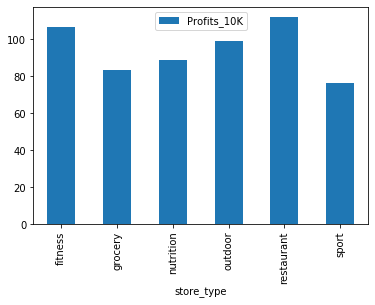

In [39]:
tt.plot.bar()

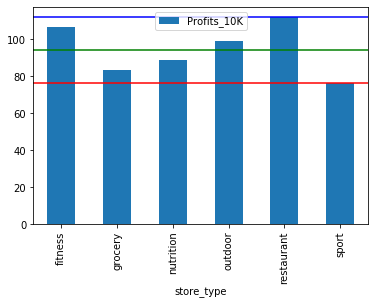

In [55]:
ax= tt.plot.bar()
ax.axhline(tt['Profits_10K'].median(), color = 'green')
ax.axhline(tt['Profits_10K'].min(), color = 'red')
ax.axhline(tt['Profits_10K'].max(), color = 'blue')
plt.show()

In [74]:
ex = pd.date_range(end='03/09/2020', start= '01/07/2020', freq='D')
ex

DatetimeIndex(['2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18',
               '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
      

In [75]:
len(ex)

63

In [50]:
import random
import time

def str_time_prop(start, end, format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formated in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))


def random_date(start, end, prop):
    return str_time_prop(start, end, '%m/%d/%Y', prop)

print(random_date("1/1/2008", "1/1/2009", random.random()))


02/28/2008


In [55]:
births = [random_date('1/1/1970', '1/1/2015', random.random())]*1000
births[0:5]

['08/16/1990', '08/16/1990', '08/16/1990', '08/16/1990', '08/16/1990']

In [60]:
dict = {'client_ID' : [np.random.randint(10000, 100000)]*1000, 
        'birth' : births,
       'product': ['check', 'saving', 'credit', 'investment']*250}

In [66]:
df_clients = pd.DataFrame(dict)
df_clients.set_index('client_ID', inplace=True)
df_clients.head()

,birth,product
client_ID,,
80226,08/16/1990,check
80226,08/16/1990,saving
80226,08/16/1990,credit
80226,08/16/1990,investment
80226,08/16/1990,check


In [95]:
df_clients['age'] = (pd.to_datetime('today')-pd.to_datetime(df_clients['birth']))

In [96]:
df_clients.sample(5)

,birth,product,age
client_ID,,,
80226,08/16/1990,investment,10809 days 11:25:50.104471
80226,08/16/1990,check,10809 days 11:25:50.104471
80226,08/16/1990,credit,10809 days 11:25:50.104471
80226,08/16/1990,investment,10809 days 11:25:50.104471
80226,08/16/1990,saving,10809 days 11:25:50.104471


In [100]:
df_clients['age'].years

AttributeError: 'Series' object has no attribute 'years'